### Text preprocessing - Word embedding using Deep Neural Network using Word2vec 
- CBOW 
- Skip Gram

In [ ]:
import sys
!{sys.executable} -m pip install gensim

In [5]:
import gensim


Gensim is a Python library for natural language processing, offering tools for document similarity, topic modeling, and word embedding. It enables efficient analysis of large text datasets for extracting meaningful patterns and insights.

In [6]:
from gensim.models import Word2Vec, KeyedVectors

We will be using pre trained model made using googole news information more 3 billion data by Google for word embedding

In [8]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300') # this eill be of size in 1662MB

[==================================================] 100.0% 1662.8/1662.8MB downloaded


Let's check one word say "King" what is the multi dimensional vector of feature representation

In [11]:
wv['king'].shape

(300,)

- All words are fixed 300 dimensional means one word have 300 nearby words
- Window size is 300

In [12]:
wv['king']

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [14]:
wv['man']

array([ 0.32617188,  0.13085938,  0.03466797, -0.08300781,  0.08984375,
       -0.04125977, -0.19824219,  0.00689697,  0.14355469,  0.0019455 ,
        0.02880859, -0.25      , -0.08398438, -0.15136719, -0.10205078,
        0.04077148, -0.09765625,  0.05932617,  0.02978516, -0.10058594,
       -0.13085938,  0.001297  ,  0.02612305, -0.27148438,  0.06396484,
       -0.19140625, -0.078125  ,  0.25976562,  0.375     , -0.04541016,
        0.16210938,  0.13671875, -0.06396484, -0.02062988, -0.09667969,
        0.25390625,  0.24804688, -0.12695312,  0.07177734,  0.3203125 ,
        0.03149414, -0.03857422,  0.21191406, -0.00811768,  0.22265625,
       -0.13476562, -0.07617188,  0.01049805, -0.05175781,  0.03808594,
       -0.13378906,  0.125     ,  0.0559082 , -0.18261719,  0.08154297,
       -0.08447266, -0.07763672, -0.04345703,  0.08105469, -0.01092529,
        0.17480469,  0.30664062, -0.04321289, -0.01416016,  0.09082031,
       -0.00927734, -0.03442383, -0.11523438,  0.12451172, -0.02

Let's find out most similar words for a word "man" based on cosine similarites

In [16]:
wv.most_similar("man")

[('woman', 0.7664012908935547),
 ('boy', 0.6824871301651001),
 ('teenager', 0.6586930155754089),
 ('teenage_girl', 0.6147903203964233),
 ('girl', 0.5921714305877686),
 ('suspected_purse_snatcher', 0.571636438369751),
 ('robber', 0.5585119128227234),
 ('Robbery_suspect', 0.5584409832954407),
 ('teen_ager', 0.5549196600914001),
 ('men', 0.5489763021469116)]

In [17]:
wv.most_similar("king")

[('kings', 0.7138045430183411),
 ('queen', 0.6510956883430481),
 ('monarch', 0.6413194537162781),
 ('crown_prince', 0.6204220056533813),
 ('prince', 0.6159993410110474),
 ('sultan', 0.5864824056625366),
 ('ruler', 0.5797567367553711),
 ('princes', 0.5646552443504333),
 ('Prince_Paras', 0.5432944297790527),
 ('throne', 0.5422105193138123)]

In [18]:
wv.similarity("man","king")

0.22942673

In [19]:
wv.similarity("royal","king")

0.52397937

In [20]:
wv.similarity("boy","man")

0.68248713

In [30]:
vector= wv["king"]-wv["man"]+wv["woman"]

In [31]:
wv.most_similar([vector])

[('king', 0.8449392318725586),
 ('queen', 0.7300517559051514),
 ('monarch', 0.645466148853302),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676352500916),
 ('prince', 0.5777117609977722),
 ('kings', 0.5613663792610168),
 ('sultan', 0.5376775860786438),
 ('Queen_Consort', 0.5344247817993164),
 ('queens', 0.5289887189865112)]

============================================================================================


### Word to Cloud

If I convert those 300 dimension to 2D then it will look as wordtoCloud

WordCloud is a Python library that creates visual representations of word frequency in a text corpus, generating "word clouds" where the size of each word reflects its frequency or importance in the given text.

In [ ]:
!{sys.executable} -m pip install wordcloud

In [23]:
import os
from os import path
from wordcloud import WordCloud

In [24]:
text = """Avul Pakir Jainulabdeen Abdul Kalam was born on 15 October 1931, to a Tamil Muslim family in the pilgrimage centre of Rameswaram on Pamban Island, then in the Madras Presidency and now in the State of Tamil Nadu. His father Jainulabdeen Marakayar was a boat owner and imam of a local mosque;[9] his mother Ashiamma was a housewife.[10][11][12][13] His father owned a ferry that took Hindu pilgrims back and forth between Rameswaram and the now uninhabited Dhanushkodi."""

In [25]:
wordcloud = WordCloud().generate(text)

In [26]:
wordcloud

Display the generated Image 

(-0.5, 399.5, 199.5, -0.5)

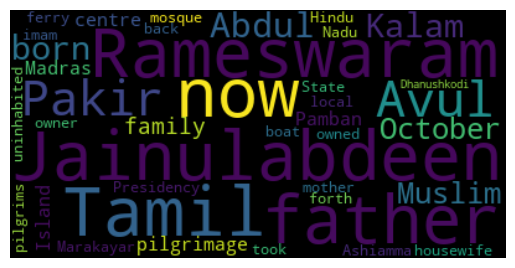

In [27]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")